In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Primero vemos la funcion
a = 0.5

def f(y):
    return (a-1)*(y**4) + y**2 

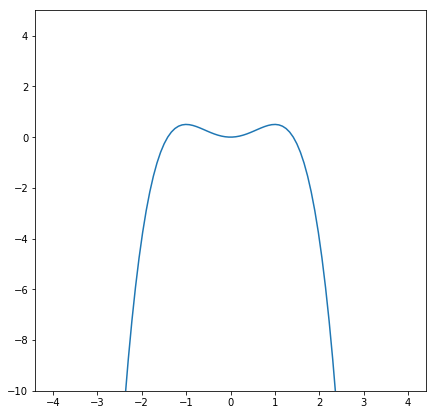

In [3]:
#Graficar la funcion
plt.figure(figsize=(7,7))
x = np.linspace(-4,4,100)
plt.ylim(-10,5)
plt.plot(x,f(x))

In [4]:
#Metodo de biseccion
def dx(f,x):
    return abs(0-f(x))

def bisec(f,a,b,tol,Nmax=500):
    n = 0
    
    p = dx(f,b)

    while True:
        
        pm = (a+b)*0.5
        
    
        if abs(f(pm)) < tol:
            break
        
        n += 1
        
        if n > Nmax:
            print ("Nmax iter max reached")
            break
    
        if f(a)*f(pm) < 0:
            b = pm
        
        if f(a)*f(pm) > 0:
            a = pm
    return print("la raíz es:",pm)        

In [5]:
#para el siguiente metodo necesitamos su derivada

def df(y):
    return 4*(y**3) + 2*y

#Metodo de Newton-Raphson

def newtonR(f,df,x0,tol,Nmax=500):
    
    p = dx(f,x0)
    
    n = 0
    while True:
        
        x0 = x0 - (f(x0))/(df(x0))
        #p = dx(f,x0)
        if n > Nmax:
            print ("Nmax iter max reached")
            break
        n += 1
        if abs(f(x0)) < tol:
            break
    
    return x0

In [6]:
#Metodo de la secante
def sec(f,x0,x1,tol,Nmax=500):
    
    n = 0
    
    p = dx(f,x1)
    
    while True:
        
        xi = x1 - f(x1)*((x1-x0)/(f(x1)-f(x0)))
        
        if n > Nmax:
            print("Nmax iter reached")
            break
        
        n += 1
        
        if abs(f(xi)) < tol:
            break
            
    return xi

In [93]:
def MetRectFalsa(f,x0,x1,tol,Nmax=500):
    n = 0
    
    p = dx(f,x1)
    
    h = x0
    
    j = x1
    
    while True:
        
        xr = x1 - (f(x1)*(x0-x1))/(f(x0)-f(x1))
        
        if n > Nmax:
            print("Nmax iter reached")
            break
            
        n +=1
        
        if abs(f(xr)) < tol:
            break
            
        if f(xr)*f(x0) < 0:
            x1 = xr
            
        if f(xr)*f(x0) > 0:
            x0 = xr
            
            
        if f(xr)*f(x1) == 0:
            print ("la raíz es",x1)
       
    
    
    if f(x0)*f(xr) > 0:
        print("la raíz está en el intervalo", [h,xr])
    if f(x0)*f(xr) < 0:
        print("la raíz esta en el intervalo", [xr,j])
            
    return xr

siendo -1 y 0.5 los intervalos que yo veo que se acercan mas al cero y del otro lado seria de 1 a 2. Este razonamiento para mirar las soluciones con ele metodo de biseccion

In [34]:
#Las soluciones de cada uno de los metodos
bisec(f,-0.5,0,1e-4)
bisec(f,1,2,1e-4)

la raíz es: -0.0078125
la raíz es: 1.4141845703125


Vemos que hay otro 0 en la gráfica que no podemos mirar por biseccion (ya que el signo en esa parte es constante) pero, si usamos el metodo de Newton-Raphson se puede encontrar. siendo este metodo el más adecuado para ese tipo de inconvenientes.

In [47]:
print("Newton",newtonR(f,df,-0.1,1e-4))

Newton -0.0064583563864453125


Metodo de la secante tiene el "mismo" algoritmo que la de Newton-Raphson, solo que esta es más "precisa". como le podemos poner un intervalo es más exacto en cuanto mirar la raíz y como tiene el mismo "algoritmo" que la de N-R no nos preocupamos de algún cambio de signo. (la usaremos para mirar en la parte de la gráfica constante)

In [95]:
print("secante",sec(f,-0.1,0.2,1e-4))

Nmax iter reached
secante -0.2020512820512821


In [94]:
print("Recta falsa",MetRectFalsa(f,-3,2.5,1e-4))

la raíz está en el intervalo [-3, 1.4142443080920581]
Recta falsa 1.4142443080920581


# Explicacion fisica
Ahora que comprendemos como funciona $\gamma$ miremos que $t' = \gamma(t\frac{vx}{c^2})$, esto quiere decir que mi $\gamma$ debe ser positiva, ya que si $\gamma < 0$ quiere decir que habra un $t' < 0$ y los tiempos negativos no existen, ahora si mi $\gamma = 0$ me estan diciendo que simplemente no se está moviendo el gas. por eso mi raíz debe ser positiva, para que tenga una realidad física